# **Lego Dataset: Data Analysis in Python**

### Authors: Daniel Radunsky, Varun Mani, Anisha Parida, Dylan Van Berkel

Legos have been a staple in children’s entertainment for decades and continue to thrive in today’s climate with hundreds of thousands of children actively enjoying this renowned product. Developed from a wooden toy in the 1930s, The Lego Group is now estimated to be worth over 11 billion dollars, with hundreds of different products readily available. While many have come and gone with their own replicas, Lego has truly skyrocketed to become one of its own in the toy industry. Consumers can buy Legos by set, which all contain a variety of pieces of different shapes and sizes that all fit together. These sets have many different themes, including partnerships with entertainment franchises such as Star Wars, Jurassic Park, and Harry Potter.


**For more resources in the world of Legos, click the following link that shows various exclusive Lego sets across different themes: [Lego Site](https://www.lego.com/en-us/categories/exclusives?icmp=HP-SHQL-Standard-NO_QL_Exclusives_Key_visual_LP-P-NO-B230N1XONC)**

**For a further breakdown of our data on Legos (Catalog, Price Guide, Color Guide, Inventories): [BrickLink Site](https://www.bricklink.com/v2/main.page)**

<br> The dataset we used is a public dataset posted on Kaggle. The initial dataset was created by user 'MattieTerzolo' for the simple purpose of curiosity regarding questions throughout the world of Legos. The dataset is in a lego_sets.csv file with 14 various columns. Some of the columns include recommended ages, set name, price, piece count, and review ratings.

**Dataset Used: [Kaggle Dataset](https://www.kaggle.com/datasets/mterzolo/lego-sets?select=lego_sets.csv)**



<br>
First, we import the numpy, matplotlib, pandas, and seaborn packages to help us initially read the Lego dataset and create data visualizations for the pulled data. Then, for clarity, we sort the rows in the lego dataset by ascending price. The describe() function shows us statistical insight into our dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

lego = pd.read_csv("datasets/lego_dataset.csv")
lego = lego.sort_values(by = 'list_price', ascending = False)
lego.describe()

,list_price,num_reviews,piece_count,play_star_rating,prod_id,star_rating,val_star_rating
count,12261.000000,10641.000000,12261.000000,10486.000000,1.226100e+04,10641.000000,10466.000000
mean,65.141998,16.826238,493.405921,4.337641,5.983675e+04,4.514134,4.228960
std,91.980429,36.368984,825.364580,0.652051,1.638115e+05,0.518865,0.660282
min,2.272400,1.000000,1.000000,1.000000,6.300000e+02,1.800000,1.000000
25%,19.990000,2.000000,97.000000,4.000000,2.103400e+04,4.300000,4.000000
50%,36.587800,6.000000,216.000000,4.500000,4.206900e+04,4.700000,4.300000
75%,70.192200,13.000000,544.000000,4.800000,7.092200e+04,5.000000,4.700000
max,1104.870000,367.000000,7541.000000,5.000000,2.000431e+06,5.000000,5.000000


<br>
The info function gives us an insight into the dataset, including the total number of cases and the details about the various columns.

In [2]:
lego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12261 entries, 9979 to 912
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  object 
 1   list_price         12261 non-null  float64
 2   num_reviews        10641 non-null  float64
 3   piece_count        12261 non-null  float64
 4   play_star_rating   10486 non-null  float64
 5   prod_desc          11884 non-null  object 
 6   prod_id            12261 non-null  float64
 7   prod_long_desc     12261 non-null  object 
 8   review_difficulty  10206 non-null  object 
 9   set_name           12261 non-null  object 
 10  star_rating        10641 non-null  float64
 11  theme_name         12258 non-null  object 
 12  val_star_rating    10466 non-null  float64
 13  country            12261 non-null  object 
dtypes: float64(7), object(7)
memory usage: 1.4+ MB


<br>
The code below shows the unique theme names that reside within the lego dataset.

In [3]:
uniqueThemeNames = (lego["theme_name"].unique())
uniqueThemeNames

array(['Star Wars™', 'SERIOUS PLAY®', 'MINDSTORMS®', 'Ghostbusters™',
       'Disney™', 'Creator Expert', 'Technic',
       'THE LEGO® NINJAGO® MOVIE™', 'THE LEGO® BATMAN MOVIE',
       'Minecraft™', 'NINJAGO®', 'DC Comics™ Super Heroes', 'City',
       'BOOST', 'Ideas', 'Indoraptor Rampage at Lockwood Estate',
       'Marvel Super Heroes', 'NEXO KNIGHTS™', 'DUPLO®', 'Friends',
       'Architecture', 'Speed Champions', 'DIMENSIONS™',
       'Carnotaurus Gyrosphere Escape', 'Elves', 'T. rex Transport',
       'DC Super Hero Girls', 'Creator 3-in-1', 'Juniors',
       'Jurassic Park Velociraptor Chase', 'Dilophosaurus Outpost Attack',
       "Blue's Helicopter Pursuit", 'Classic', 'Stygimoloch Breakout',
       'LEGO® Creator 3-in-1', 'Power Functions', nan, 'BrickHeadz',
       'Pteranodon Chase', 'Angry Birds™', 'Minifigures'], dtype=object)

<br>
The code below shows the distinct countries where the Lego sets in the dataset are distributed and sold.

In [4]:
print(lego["country"].unique())

['NO' 'FI' 'NZ' 'BE' 'LU' 'NL' 'PL' 'AU' 'FR' 'IT' 'AT' 'ES' 'DE' 'PT'
 'IE' 'CH' 'CZ' 'GB' 'DN' 'US' 'CA']


<br>
The code below shows the distinct sets in the dataset, since some sets in the original dataset contain duplicate sets that are sold in distinct countries.

In [5]:
distinctSets = lego.drop_duplicates(subset = 'set_name')
distinctSets.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
9979,16+,1104.8700,198.0,7541.0,4.0,Travel the LEGO® galaxy in the ultimate Millen...,75192.0,"Welcome to the largest, most detailed LEGO® St...",Challenging,Millennium Falcon™,4.8,Star Wars™,4.4,NO
11041,6+,922.9929,7.0,2631.0,4.7,NaN,2000430.0,The LEGO® SERIOUS PLAY® program is a radical a...,Easy,Identity and Landscape Kit,4.6,SERIOUS PLAY®,3.6,NZ
3766,6+,821.0898,8.0,2455.0,3.7,NaN,2000431.0,The LEGO® SERIOUS PLAY® program is a radical a...,Average,Connections Kit,3.4,SERIOUS PLAY®,2.9,CH
6562,14+,731.9390,85.0,4016.0,4.5,Win the battle for the Empire with the awesome...,75159.0,Reenact amazing scenes from the Star Wars saga...,Challenging,Death Star™,3.9,Star Wars™,3.5,FI
11043,6+,567.2900,2.0,4900.0,5.0,NaN,2000409.0,The LEGO® SERIOUS PLAY® program is a radical a...,Easy,Window Exploration Bag,5.0,SERIOUS PLAY®,5.0,NZ


<br>
This code shows the distinct theme names sorted by the highest piece count of a set within each respective theme.

In [6]:
distinctThemes = lego.drop_duplicates(subset = 'theme_name')

sortedByCount = distinctThemes.sort_values(by = 'piece_count', ascending = False)

sortedByCount[['theme_name','piece_count']].head(10)
##THIS CODE HAS TO BE CHANGED SAME AS ABOVE.


,theme_name,piece_count
9979,Star Wars™,7541.0
6250,Creator Expert,5923.0
6663,THE LEGO® NINJAGO® MOVIE™,4867.0
9754,Ghostbusters™,4634.0
9643,Disney™,4080.0
10004,THE LEGO® BATMAN MOVIE,3444.0
6480,Minecraft™,2863.0
4397,Technic,2704.0
11041,SERIOUS PLAY®,2631.0
204,DC Comics™ Super Heroes,2526.0


### **Question 1: What features might contribute to a higher star rating?**

The star rating of the Lego dataset is the accumulation of reviews based on what the customer thought of the product. These reviews provide future potential buyers with a baseline of what other consumers thought of the product.

*We began coding by pulling any relevant data that could have affected the star rating of a product, such as the price, number of reviews, and piece count. Afterward, we utilized the “group by” function to list the values of star reviews in ascending order. From here, we were able to draw multiple conclusions.*


In [7]:
stardf = lego[['list_price', 'num_reviews','piece_count','star_rating']]
stardf = stardf.groupby('star_rating').mean().reset_index()

stardf


,star_rating,list_price,num_reviews,piece_count
0,1.8,74.827981,37.000000,370.000000
1,2.2,29.228790,6.000000,24.000000
2,2.5,22.148600,89.000000,24.000000
3,2.6,68.722523,23.169231,518.430769
4,2.7,38.984171,3.000000,378.000000
5,2.8,54.791100,5.000000,475.000000
6,2.9,17.071100,19.000000,61.000000
7,3.0,17.231586,1.792453,114.000000
8,3.2,53.239372,5.606742,337.157303
9,3.3,63.530473,16.000000,464.666667


*On average, the products with the worst reviews often had a high price for a low number of pieces. It can be assumed that the customer did not feel that they were getting the value of what they paid for from the product. Products with higher star ratings often provided a higher number of pieces, making the value of the product much higher.*


### **Question 2: How many products fall within the different price ranges? (We would have to categoirize this into low, medium, high, and very high).**

In [8]:
low = len(distinctSets.loc[distinctSets['list_price'] < 25])
medium = len(distinctSets.loc[distinctSets['list_price'] < 50]) - low
high = len(distinctSets.loc[distinctSets['list_price'] < 75]) - medium
max_high = len(distinctSets.loc[distinctSets['list_price'] >= 75])

print("There are " + str(low)+ " low priced lego sets priced between $0-$25" )
print("There are " + str(medium) + " medium priced lego sets priced between $25-$50" )
print("There are " + str(high) + " high priced lego sets priced between $50-75$" )
print("There are " + str(max_high) + " very high priced lego sets priced higher than $75" )

There are 251 low priced lego sets priced between $0-$25
There are 214 medium priced lego sets priced between $25-$50
There are 347 high priced lego sets priced between $50-75$
There are 180 very high priced lego sets priced higher than $75


*Here, prices of legos are broken down into low priced, medium priced, high priced. and very high priced. It shows how many legos fall under each price range where each category increases by an interval of 25. This is useful if the consumer has a specific budget and is willing to get a Lego set that is within a certain price range.*

### **Question 3: Piece count of lego sets based on themes. Which themes have the highest and lowest piece counts on average?**

Text(0, 0.5, 'Theme')

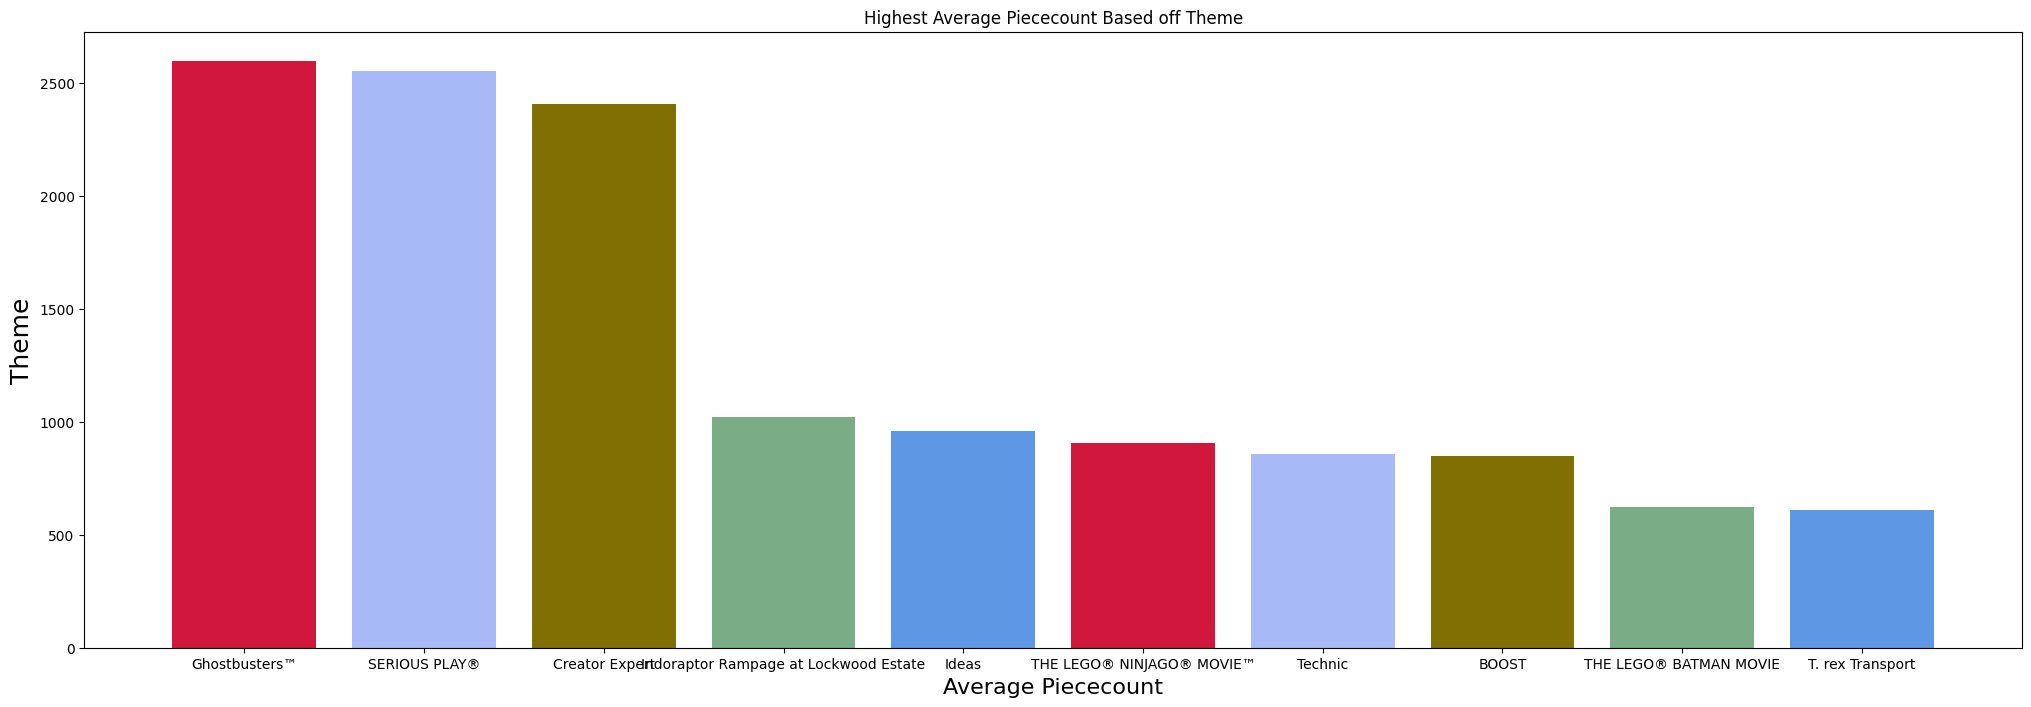

In [9]:
theme_grouped = distinctSets.groupby("theme_name") 
pieceByTheme = theme_grouped["piece_count"] 
distinctMean = pieceByTheme.mean() 
pieceByTheme.median() 
top10 = distinctMean.nlargest(10).reset_index() 
plt.figure(figsize=(25, 8)) 
bar_colors = np.random.rand(5, 3)
plt.bar(top10["theme_name"], top10["piece_count"], color= bar_colors) 
plt.title("Highest Average Piececount Based off Theme") 
plt.xlabel("Average Piececount", fontsize = 16) 
plt.ylabel("Theme", fontsize = 18)

*The bar graph shown below represents the piece count for Lego sets within distinct themes. This shows the top 10 themes with the highest average piece count per set. As seen, the highest mean piece count belongs to Ghostbusters sets, followed by SERIOUS PLAY sets, and then Creator Expert sets.*

### **Question 4: What is the correlation between the piece count and the price of each set?**

*For the manufacturer, the amount of pieces they use to create a product directly correlates with the price of the product for the consumer. If a product requires more pieces to create, it is going to up the costs of manufacturing. This code analyzes how the number of pieces can spike the price of a Lego product, visualizing a set’s number of pieces versus its price to see if there is a correlation.*


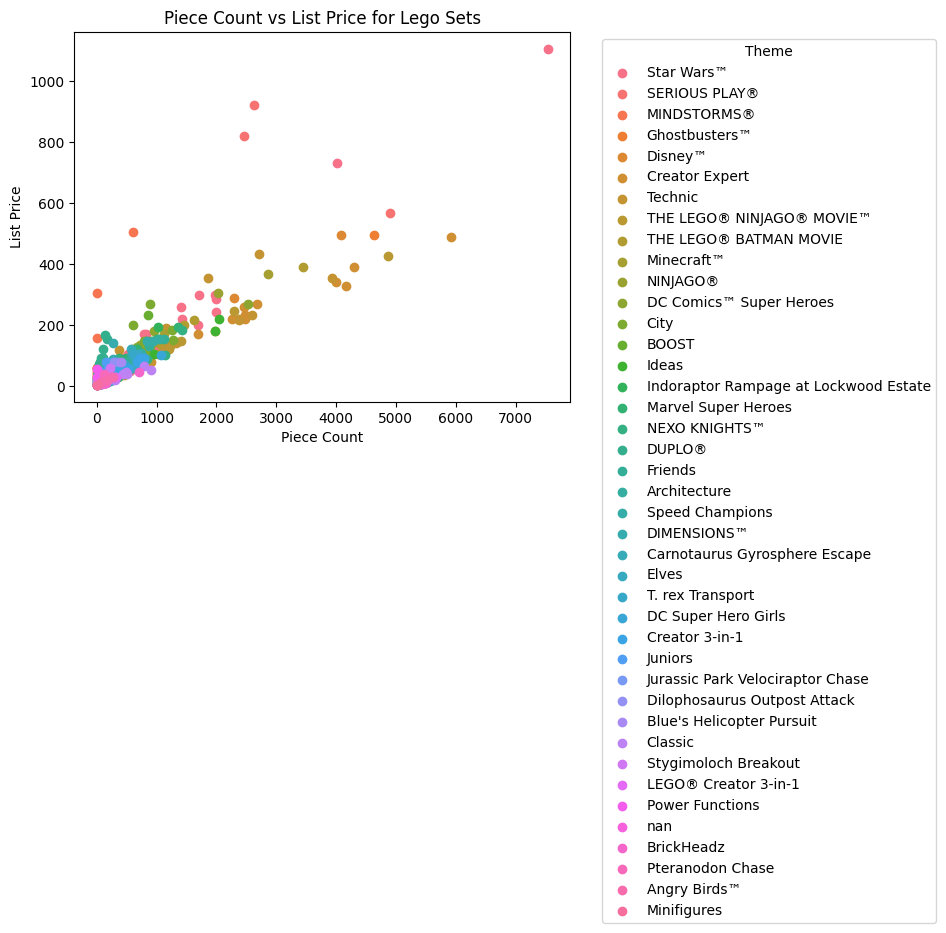

In [10]:
palette = sns.color_palette("husl", n_colors=len(uniqueThemeNames))

for i, theme in enumerate(uniqueThemeNames):
    theme_data = distinctSets[distinctSets['theme_name'] == theme]
    plt.scatter(theme_data['piece_count'], theme_data['list_price'], label=theme, color=palette[i])
    
x = theme_data['piece_count'].mean()
y = theme_data['list_price'].mean()

plt.title('Piece Count vs List Price for Lego Sets')
plt.xlabel('Piece Count')
plt.ylabel('List Price')
plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add a legend
plt.show()



*Our code began by generating a for-loop to iterate through every Lego product in the dataset. Within the for-loop, we generated the scatter plot to mark our points. Based on which theme a set belonged to, the set generated a certain color. Based on the visualization, there is an overall positive correlation between the price and the number of pieces regardless of theme.*

In [11]:
x = round(x,3)
y = round(y, 3)
bestFit = ('y = ', x, 'x + ', y )
print(''.join(map(str, bestFit)))

y = 7.5x + 4.588


### **Question 5: Is there a correlation between the the price of a Lego set and its review difficulty?**

Text(0.5, 0.98, '')

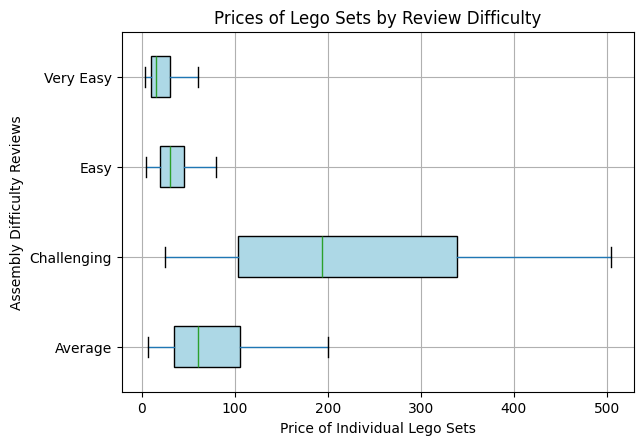

In [12]:
distinctSets.boxplot(column = 'list_price', by = 'review_difficulty', patch_artist = True, vert = False, showfliers = False, boxprops = dict(facecolor = 'lightblue'))
plt.xlabel('Price of Individual Lego Sets')
plt.ylabel('Assembly Difficulty Reviews')
plt.title('Prices of Lego Sets by Review Difficulty')
plt.suptitle('')

*In the data visualization above, we can see the four distinct review difficulties mapped separately as boxplots. As seen, the easy and very easy categories have the least variance in price, as well as the lowest mean price. This is likely due to the fact that the difficulty to assemble a Lego set directly correlates with the piece count of the set, which is proportional to the price. The visualization also shows that the challenging difficulty has the greatest variance, along with the highest mean price.*

### **Question 6: What are the primary differences between the cheapest and most expensive Lego sets?**

In [13]:
mostExpensiveSet = distinctSets.head(1)
leastExpensiveSet = distinctSets.tail(1)

pd.concat([leastExpensiveSet, mostExpensiveSet]).sort_values(by = 'list_price', ascending = False)


,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
9979,16+,1104.870,198.0,7541.0,4.0,Travel the LEGO® galaxy in the ultimate Millen...,75192.0,"Welcome to the largest, most detailed LEGO® St...",Challenging,Millennium Falcon™,4.8,Star Wars™,4.4,NO
6228,4+,3.599,180.0,1.0,4.0,Everyone needs one!,630.0,This tool makes it a snap to pull those small ...,Very Easy,Brick Separator,4.8,Classic,4.6,FI


*The above dataframe shows the difference between the most expensive and the least expensive Lego set in our data. As shown, the most expensive set is the Millennium Falcon, which belongs to the Star Wars theme. It has a piece count of over 7000, and its price is approximately 1100. This is drastically greater than the least expensive set, which is a Brick Separator in the Classic theme. This set only costs 3.59. Also, the least expensive set has a Very Easy review difficulty while the most expensive set is listed as Challenging. This is a direct proof of our correlation in (Question 5), where we show that the review difficulty scales proportionally to the piece count. Despite all of their differences, both sets have a star rating of 4.8. This data can be useful if someone is looking for an expensive set (as a gift) or a cheap set to get for their kids.*

### **Question 7: What age range is most popular among lego sets?**

*When a Lego product is released, the label often recommends the set for a specific age range. This can vary from set to set and is often reflective of how difficult it is to build the Lego set. While this recommendation is irrelevant for anyone older, this can be important for consumers who want to buy it for a person of a certain age. Parents for example may not want to buy a toy for their child that can be too difficult to assemble.*


Text(0.5, 1.0, 'Percentage of Lego Sets within Given Age Ranges')

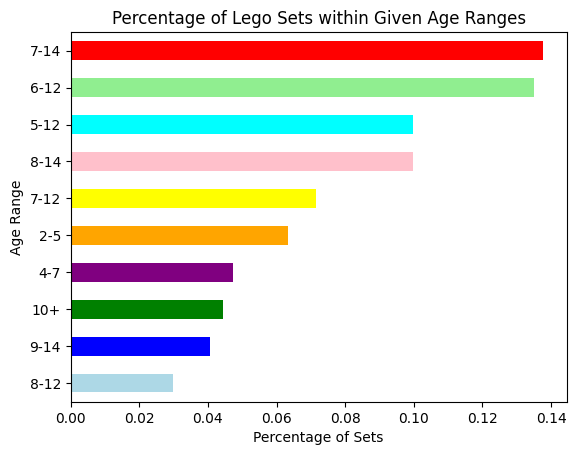

In [14]:
colors = ['lightblue', 'blue', 'green', 'purple', 'orange', 'yellow', 'pink', 'cyan', 'lightgreen', 'red']
variousAges = distinctSets.groupby(['ages']).size().sort_values(ascending = True)

percentage = variousAges / len(distinctSets)

percentage.tail(10).plot.barh(color = colors)
plt.xlabel('Percentage of Sets') 
plt.ylabel('Age Range')
plt.title('Percentage of Lego Sets within Given Age Ranges')


*This code analyzes the dataset to understand what age group is most commonly used. The code begins by utilizing the “groupby” function to group all the sets best off their age groups and store them in ascending order. This line is followed by an operation to divide the various age groups by the total number of sets, calculating the total percentage each age group holds in the dataset. This data is visualized through a bar graph, which shows the ages between 7-14 were most popular among Lego sets.*

### **Contributions**

**Anisha:** Throughout this project, I helped to coordinate times for our groups to meet outside of class. I was not familiar with GitHub before, but my group members were really helpful in getting me more familiar with the process. We all came up with questions and even helped further improve those questions. For example, Varun needed clarification on part of his code, and I was able to help him. Similarly, Dan helped me find a more efficient way to write code for question two, improving what I already have. Varun and I went to office hours whenever we were unsure about a certain aspect of the project; we ended up going twice. 

**Daniel:** My contributions to this project include setting up the GitHub repository, formulating some of the guiding questions for our dataset, and scraping our data initially. Specifically, I organized the GitHub repository with multiple folders including the source data files, the final Python file, and the GitHub Pages html files. When scraping the data, I made multiple data frames from the original dataset that removed duplicates, showed statistical insight, and printed selective columns. We collaborated multiple times in-person after Thanksgiving break to efficiently create data visualizations and combine ideas about various questions.

**Varun**: For our project, Dan and I completed most of the programming necessary for our queries. I primarily focused on data visualization and modeling for our questions, developing the graphs and plots to showcase our data. Throughout the course of our project, we met four times outside of the classroom which Anisha coordinated. We set deadlines based on questions, trying to complete and implement a certain number of questions before each meeting as a soft deadline. Our repository was owned by Dan, who completed the translation from our codespace to pages and our URL. During meetings, we helped each other with questions we had, improving any existing code and debugging. When we had questions we were not sure about, Anisha and I came to office hours. My graphs and models provided proper visualization for our dataset, which helped answer our queries. 

**Dylan:** In the Lego dataset project, I worked on doing most of the analysis for the questions. For question 1, I worked on seeing if the average price for the low and high-rated sets have anything to do with each other. I was able to show that the higher-rated sets did have an average price of almost $20 higher. In question 2, my role was to categorize the Lego sets by price, offering insights into the spending patterns of consumers. In question 3, I examined the complexity of the sets, linking the number of pieces and age recommendations to their assembly difficulty. For question 5, I looked into the customer reviews and star ratings, shedding light on how much people enjoyed the Lego sets, and seeing the key differences between the review difficulties. Lastly, in question 6, I analyzed the key differences between the highest and lowest-priced lego sets, to see how differently people thought of them. My analytical work provided valuable findings that contributed to the overall understanding and success of the project.

